In [7]:
# German Traffic Sign Recognition Benchmark 
# 对交通图标进行分类
# 39,209 training samples and 12,630 testing samples, representing 43 different traffic signs
import pickle
import mxnet as mx
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as Figure
import cv2
import logging
import os

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
mx.__version__

'0.10.0'

In [2]:
# The German Traffic Sign Recognition Benchmark
#
# sample code for reading the traffic sign images and the
# corresponding labels
#
# example:
#            
# trainImages, trainLabels = readTrafficSigns('GTSRB/Training')
# print len(trainLabels), len(trainImages)
# plt.imshow(trainImages[42])
# plt.show()
#
# have fun, Christian

import matplotlib.pyplot as plt
import csv

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        gtReader.next() # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

In [3]:
train_dir = "data/GTSRB/Final_Training/Images"
images, labels = readTrafficSigns(train_dir)

ValueError: Only know how to handle extensions: [u'png']; with Pillow installed matplotlib can handle more images

In [4]:
len(images), len(labels)

images[0].shape

#len(np.unique(labels))

NameError: name 'images' is not defined

In [8]:
# 加载数据
train_file = "data/train.p1"
valid_file = "data/valid.p1"
def load_file(file_name):
    with open(file_name, mode='rb') as f:
        data = pickle.load(f)
    return data

train = load_file(train_file)
valid = load_file(valid_file)

In [9]:
x_train, y_train = train["features"], train["labels"]
x_valid, y_valid = valid["features"], valid["labels"]
print(len(x_train))
print(len(x_valid))
print(x_train[0].shape)
print(len(np.unique(y_train)))

34799
4410
(32, 32, 3)
43


In [10]:
# 记录训练集数据的一些信息
img_size = x_train[0].shape[0]
num_channels = x_train[0].shape[2]
num_classes = len(np.unique(y_train))

In [11]:
import csv
def read_csv_and_parse():
    traffic_labels_dict ={}
    with open('data/signnames.csv') as f:
        reader = csv.reader(f)
        count = -1;
        for row in reader:
            #print row
            count = count + 1
            if(count == 0):
                continue
            label_index = int(row[0])
            traffic_labels_dict[label_index] = row[1]
    return traffic_labels_dict
traffic_labels_dict = read_csv_and_parse()
print(traffic_labels_dict)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

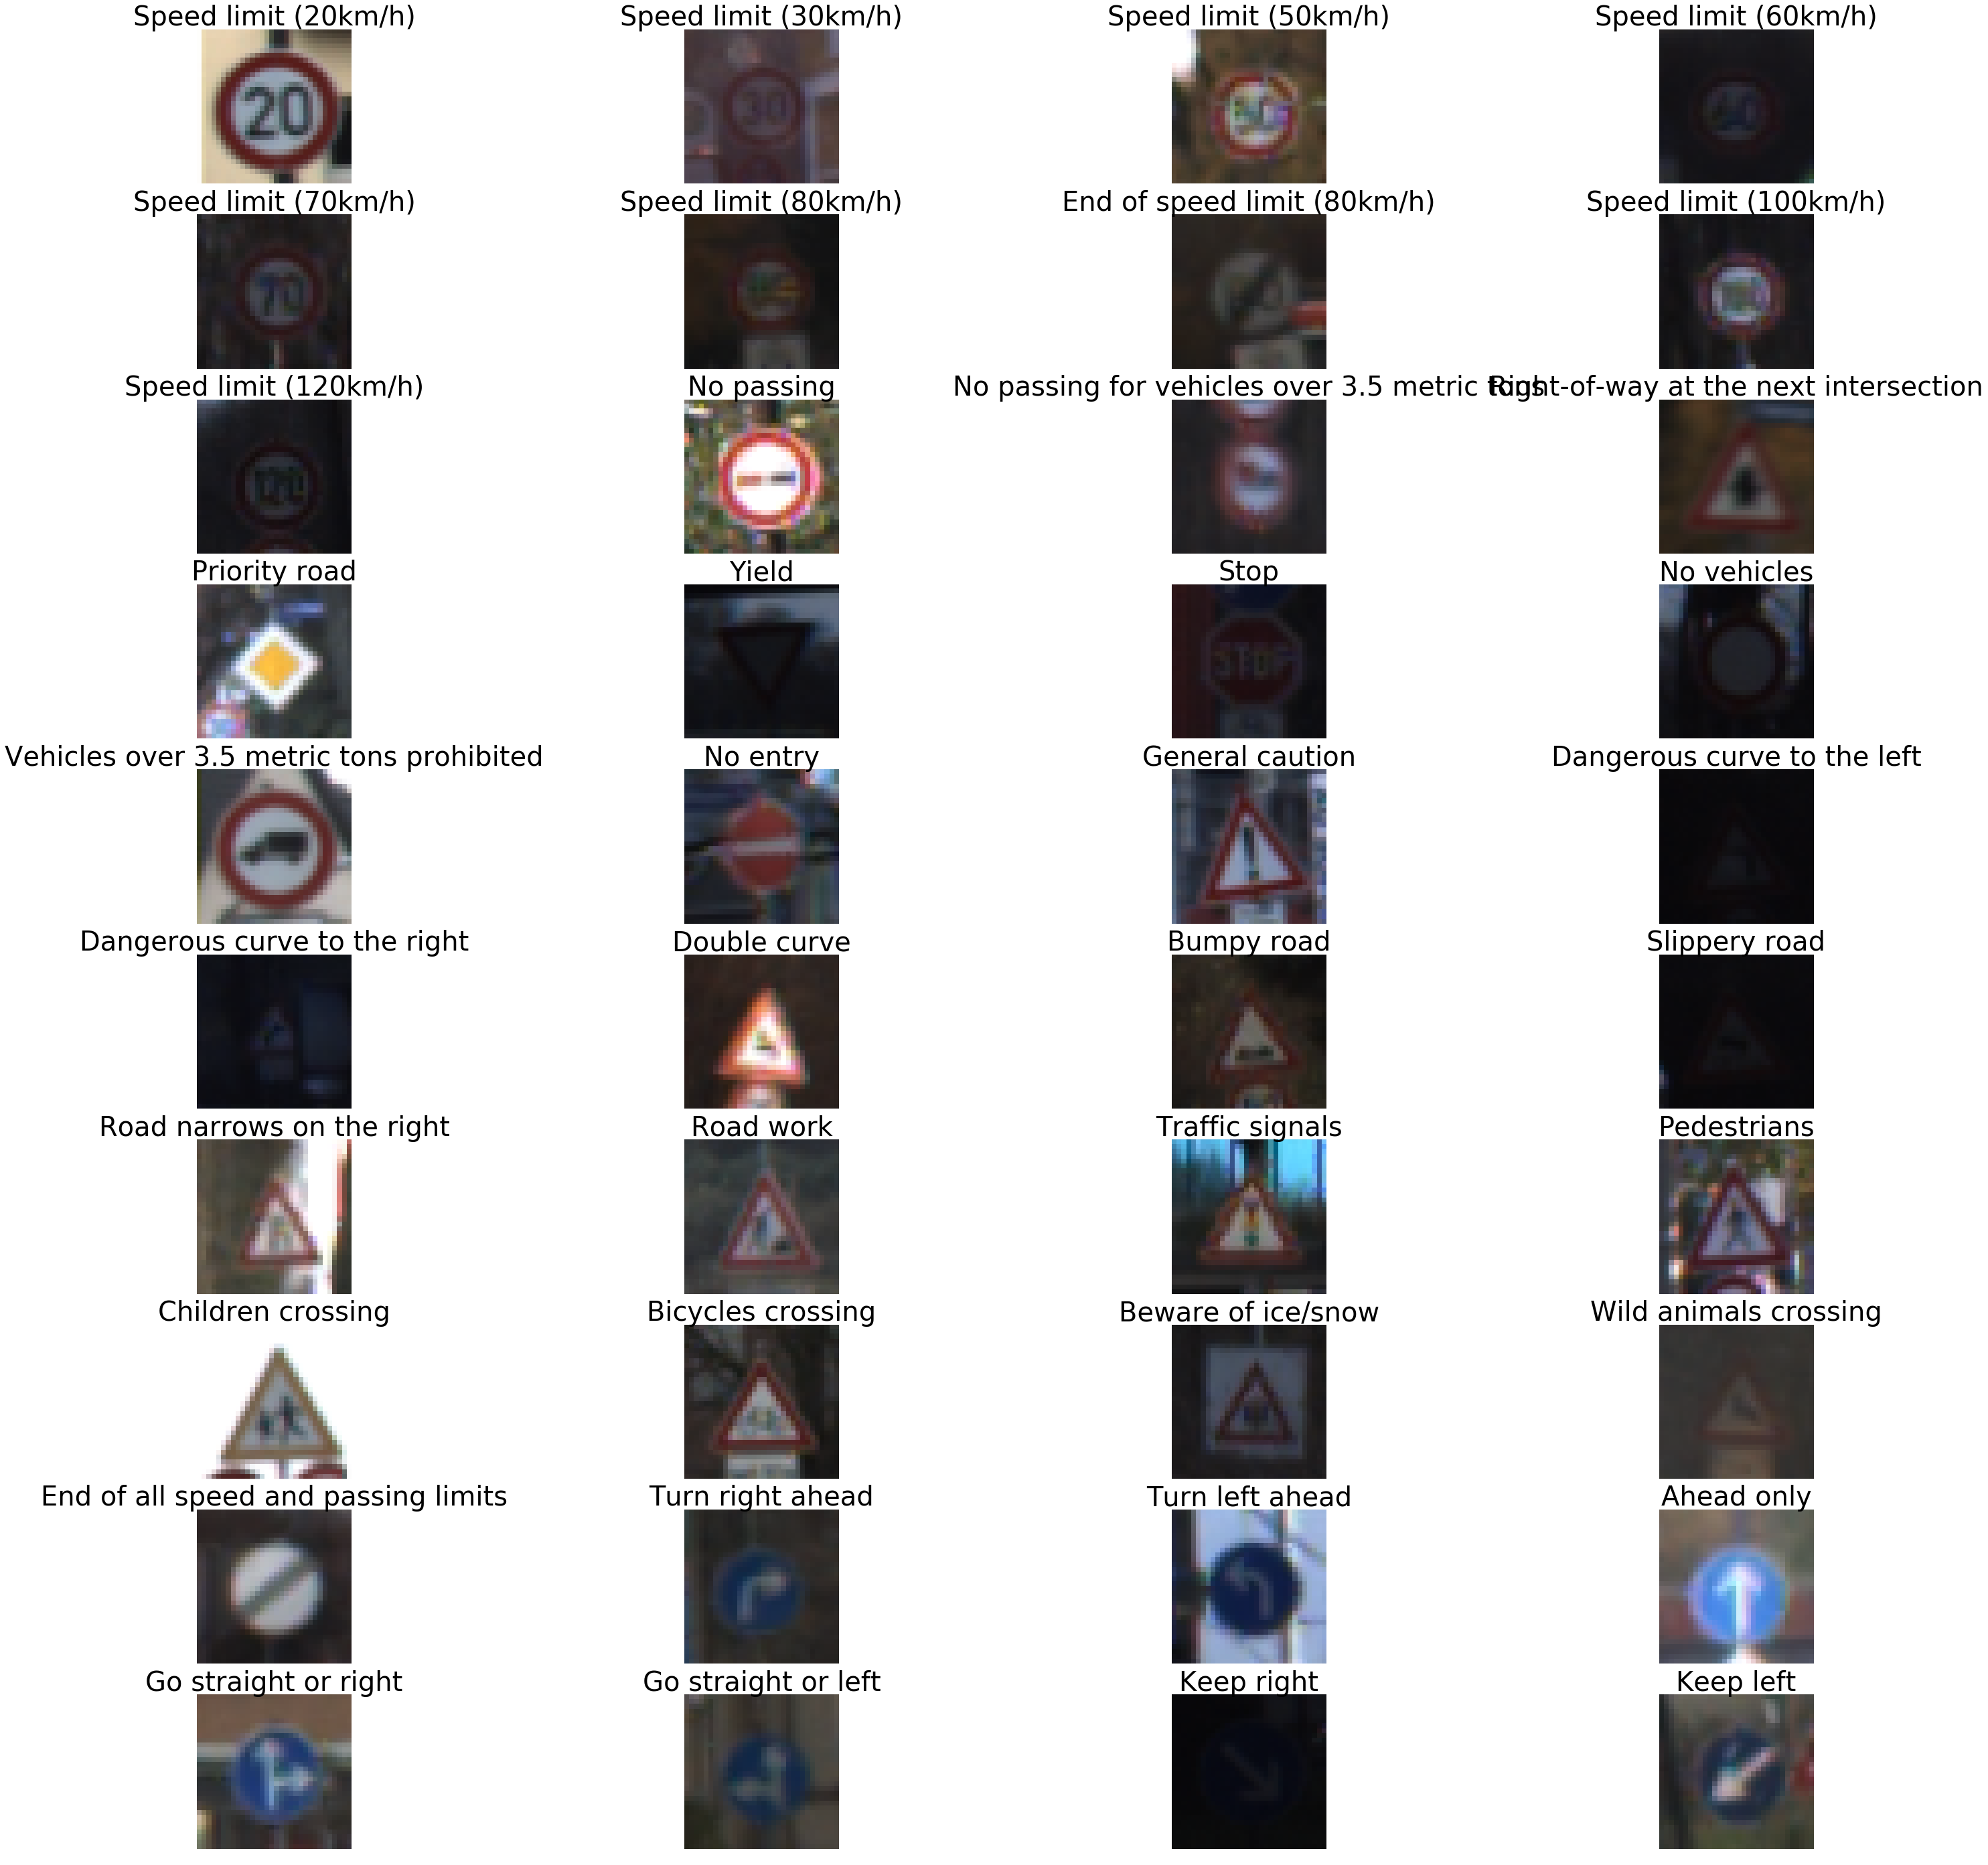

In [12]:
# 下一步，将这些图片展示
%matplotlib inline

def get_images_to_plot(images, labels):
    image = []
    idx = []
    for i in range(num_classes):
        select = np.where(labels == i)[0][0]
        image.append(images[select])
        idx.append(select)
    return image, idx


def plot_images(image, y_val, row=5, col=10, idx=None):
    count = 0
    f, axarr = plt.subplots(row, col, figsize=(50, 50))
    
    for i in range(row):
        for j in range(col):
            if count < len(image):
                axarr[i,j].imshow(image[count])
                if(idx != None):
                    axarr[i,j].set_title(traffic_labels_dict[y_val[idx[count]]], fontsize=40)
            axarr[i, j].axis('off')
            count += 1
        

select_image, idx = get_images_to_plot(x_train, y_train)
plot_images(select_image, row=10, col=4, idx=idx, y_val=y_train)

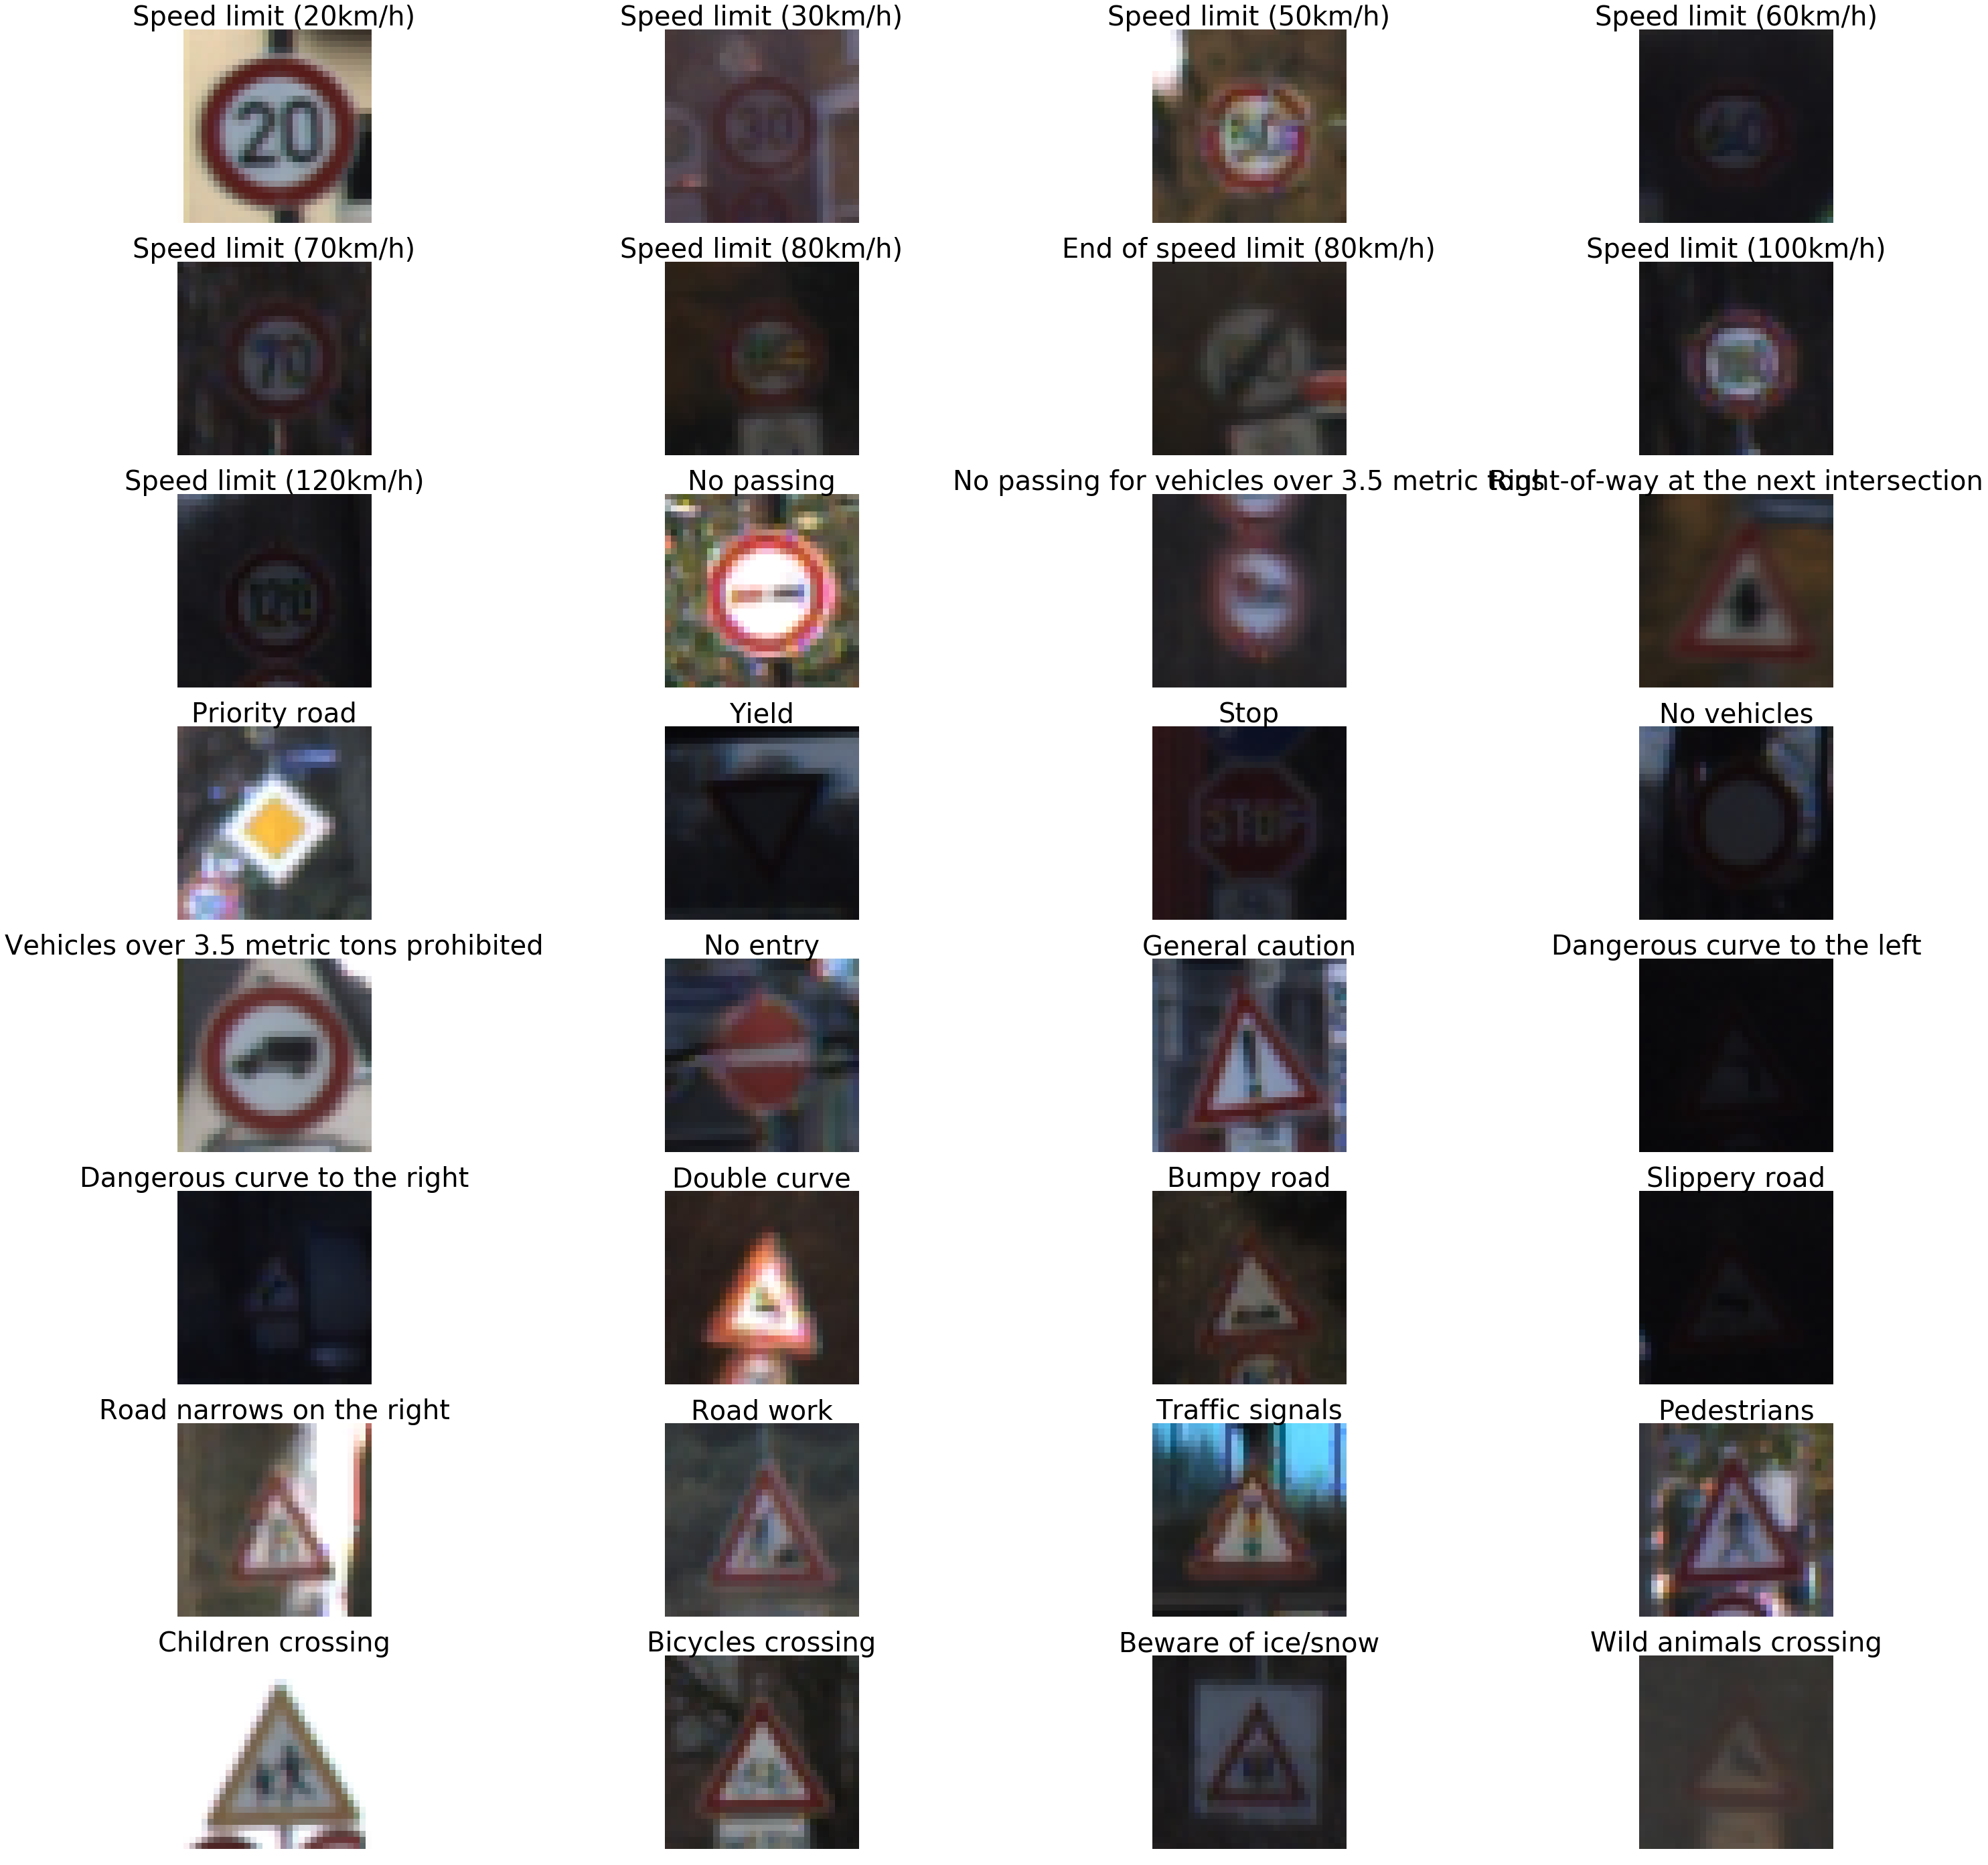

In [10]:
select_iamge, idx = get_images_to_plot(x_valid, y_valid)
plot_images(select_image, y_valid, idx=idx, row=8, col=4)

(34799, 3, 32, 32)
(4410, 3, 32, 32)


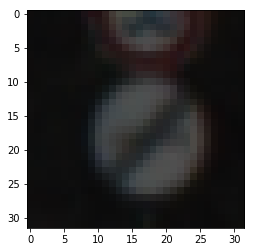

In [13]:
#change the image dimensioning from 32 X 32 X 3 to 3 X 32 X 32 for train
# 改变图片的维度，方便后续训练 ？？？
X_train_reshape = np.transpose(x_train, (0, 3, 1, 2))
plt.imshow(X_train_reshape[0].transpose((1,2,0)))
print(X_train_reshape.shape)

X_valid_reshape = np.transpose(x_valid, (0, 3, 1, 2))
plt.imshow(X_valid_reshape[1].transpose((1,2,0)))
print(X_valid_reshape.shape)

In [14]:
# 网络结构定义
data = mx.symbol.Variable('data')
# 第一层
# 卷积
conv1 = mx.sym.Convolution(data=data, pad=(1,1), kernel=(3,3), num_filter=24, name="conv1")
# 激活
relu1 = mx.sym.Activation(data=conv1, act_type="relu", name= "relu1")
# pool 层
pool1 = mx.sym.Pooling(data=relu1, pool_type="max", kernel=(2,2), stride=(2,2),name="max_pool1")
# 第二层
# second conv layer
conv2 = mx.sym.Convolution(data=pool1, kernel=(3,3), num_filter=48, name="conv2", pad=(1,1))
relu2 = mx.sym.Activation(data=conv2, act_type="relu", name="relu2")
pool2 = mx.sym.Pooling(data=relu2, pool_type="max", kernel=(2,2), stride=(2,2),name="max_pool2")
# 第三层
conv3 = mx.sym.Convolution(data=pool2, kernel=(5,5), num_filter=64, name="conv3")
relu3 = mx.sym.Activation(data=conv3, act_type="relu", name="relu3")
pool3 = mx.sym.Pooling(data=relu3, pool_type="max", kernel=(2,2), stride=(2,2),name="max_pool3")

#conv4 = mx.sym.Convolution(data=conv3, kernel=(5,5), num_filter=64, name="conv3")
#relu4 = mx.sym.Activation(data=conv4, act_type="relu", name="relu3")
#pool4 = mx.sym.Pooling(data=relu4, pool_type="max", kernel=(2,2), stride=(2,2),name="max_pool3")
# 全连接层
# first fullc layer
flatten = mx.sym.Flatten(data=pool3)
fc1 = mx.symbol.FullyConnected(data=flatten, num_hidden=500, name="fc1")
relu3 = mx.sym.Activation(data=fc1, act_type="relu" , name="relu3")
# 第二层全连接层
# second fullc
fc2 = mx.sym.FullyConnected(data=relu3, num_hidden=43,name="final_fc")
# 输出层
# softmax loss
mynet = mx.sym.SoftmaxOutput(data=fc2, name='softmax')

In [13]:
mynet.list_arguments()

['data',
 'conv1_weight',
 'conv1_bias',
 'conv2_weight',
 'conv2_bias',
 'conv3_weight',
 'conv3_bias',
 'fc1_weight',
 'fc1_bias',
 'final_fc_weight',
 'final_fc_bias',
 'softmax_label']

In [26]:
batch_size = 64 # 批次训练大小
X_train_set_as_float = X_train_reshape.astype('float32')
#Noramilsing the image pixel to value between 0 to 1.0
X_train_set_norm = X_train_set_as_float[:] / 255.0 # 归一化

#Noramilsing the image pixel to value between 0 to 1.0
X_validation_set_as_float = X_valid_reshape.astype('float32')
X_validation_set_norm = X_validation_set_as_float[:] / 255.0 

print("train set : ", X_train_set_norm.shape)
print("validation set : ", X_validation_set_norm.shape)
print("y train set : ", y_train.shape)
print("y validation set :", y_valid.shape)

train_iter =mx.io.NDArrayIter(X_train_set_as_float, y_train, batch_size, shuffle=True)
val_iter = mx.io.NDArrayIter(X_validation_set_as_float, y_valid, batch_size,shuffle=True)



('train set : ', (34799, 3, 32, 32))
('validation set : ', (4410, 3, 32, 32))
('y train set : ', (34799,))
('y validation set :', (4410,))


In [20]:
# 训练神经网络
# 采用Adam 优化权重值
#Create Adam optimiser
opt = mx.optimizer.create('adam')

#Checkpointing (saving the model). Make sure there is folder named models exist
model_prefix = 'models/chkpt'
checkpoint = mx.callback.do_checkpoint(model_prefix)
                                       
# 创建模型
#Loading the module API. Previously mxnet used feedforward (deprecated)                                       
model =  mx.mod.Module(
    context = mx.cpu(),     # use GPU 0 for training; if you don't have a gpu use mx.cpu()
    symbol = mynet,
    data_names=['data']
   )
                                       
# 开始执行模型， 运行10轮
#actually fit the model for 10 epochs. Can take 5 minutes                                      
model.fit(
    train_iter,
    eval_data=val_iter, 
    batch_end_callback = mx.callback.Speedometer(batch_size, 64),
    num_epoch = 10, 
    eval_metric='acc',
    optimizer = opt,
    epoch_end_callback=checkpoint
)

INFO:root:Epoch[0] Batch [64]	Speed: 295.47 samples/sec	accuracy=0.047596
INFO:root:Epoch[0] Batch [128]	Speed: 296.09 samples/sec	accuracy=0.058594
INFO:root:Epoch[0] Batch [192]	Speed: 283.29 samples/sec	accuracy=0.076660
INFO:root:Epoch[0] Batch [256]	Speed: 296.70 samples/sec	accuracy=0.228516
INFO:root:Epoch[0] Batch [320]	Speed: 292.56 samples/sec	accuracy=0.360596
INFO:root:Epoch[0] Batch [384]	Speed: 271.61 samples/sec	accuracy=0.436523
INFO:root:Epoch[0] Batch [448]	Speed: 272.40 samples/sec	accuracy=0.551270
INFO:root:Epoch[0] Batch [512]	Speed: 289.54 samples/sec	accuracy=0.639648
INFO:root:Epoch[0] Train-accuracy=0.695060
INFO:root:Epoch[0] Time cost=121.120
INFO:root:Saved checkpoint to "models/chkpt-0001.params"
INFO:root:Epoch[0] Validation-accuracy=0.685915
INFO:root:Epoch[1] Batch [64]	Speed: 287.06 samples/sec	accuracy=0.756731
INFO:root:Epoch[1] Batch [128]	Speed: 262.71 samples/sec	accuracy=0.812500
INFO:root:Epoch[1] Batch [192]	Speed: 258.35 samples/sec	accuracy=0

In [21]:
# 在验证集上的准确率
acc = mx.metric.Accuracy()
model.score(val_iter,acc)
print(acc)

EvalMetric: {'accuracy': 0.8992300724637681}


In [33]:
model_prefix = 'models/chkpt'
# Load the model from the checkpoint , we are loading the 10 epoch
# 加载最优的check point
sym, arg_params, aux_params = mx.model.load_checkpoint(model_prefix, 10)

# Assign the loaded parameters to the module
mod = mx.mod.Module(symbol=sym, context=mx.cpu())
mod.bind(for_training=False, data_shapes=[('data', (1,3,32,32))])
mod.set_params(arg_params, aux_params)



[  2.20590406e-23   1.40718699e-19   3.44560118e-23   1.63610469e-28
   8.44390106e-25   1.56341404e-24   1.40129846e-45   2.38891417e-21
   1.03317673e-23   1.78097438e-21   2.77731041e-14   5.11850610e-29
   2.97603374e-15   5.20964755e-16   1.00000000e+00   2.82738109e-18
   3.21317738e-42   3.56789251e-14   3.73979484e-30   5.19067540e-34
   9.92037306e-29   6.16434739e-31   9.56536892e-28   5.81374772e-26
   6.01162180e-28   2.91853469e-14   1.10399143e-19   1.59129911e-36
   4.61597645e-27   1.10444859e-15   7.86068177e-32   1.14860951e-33
   1.51103829e-28   2.71255497e-29   1.32618887e-41   2.85301311e-27
   1.34376966e-30   6.75145600e-42   2.88675232e-28   9.82860654e-38
   5.22922615e-36   3.65838366e-27   1.46942048e-31]
1.0
class=Stop
3.56789e-14
class=No entry
2.91853e-14
class=Road work
2.77731e-14
class=No passing for vehicles over 3.5 metric tons
2.97603e-15
class=Priority road


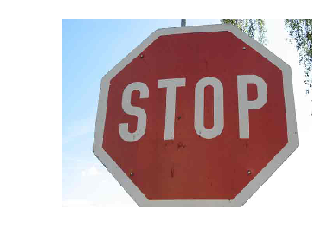

In [34]:
#Prediction for random traffic sign from internet
# 预测图片
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])
import cv2
import matplotlib.pyplot as plt
import numpy as np
#load the image , resizes it to 32*32 and converts it to 1*3*32*32 
def get_image(url, show=False):
    # download and show the image
    img =cv2.imread(url)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (32, 32))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2) #swaps axis to make it 3*32*32
#     plt.imshow(img.transpose(1,2,0))
#     plt.axis('off')
    img = img[np.newaxis, :] # Add a extra axis to the image so it becomes 1*3*32*32
    return img

def predict(url):
    img = get_image(url, show=True)
    # compute the predict probabilities
    mod.forward(Batch([mx.nd.array(img)]))
    prob = mod.get_outputs()[0].asnumpy()
    # print the top-5
    prob = np.squeeze(prob)
    print prob
    class_index = np.argsort(prob)[::-1] # 返回排序索引值
    for i in class_index[0:5]:
        print prob[i]
        print('class=%s' %(traffic_labels_dict[i]))

predict('data/stop.jpg',)